<a href="https://colab.research.google.com/github/abhilb/Open-eye-closed-eye-classification/blob/main/part2/MRL_Dataset_FullyConnected_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from pathlib import Path
from tensorflow.keras.layers import Dense, Dropout, Softmax, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
!gdown https://drive.google.com/uc?id=1JkdFa4fj0DMrDHju7QqC4EiUfJD9Cjws

Downloading...
From: https://drive.google.com/uc?id=1JkdFa4fj0DMrDHju7QqC4EiUfJD9Cjws
To: /content/mrl_dataset.npz
696MB [00:06, 112MB/s]


In [6]:
dataset_path = Path('mrl_dataset.npz').absolute().resolve()
data = np.load(str(dataset_path))
X = data['data']
y = np.squeeze(data['labels'])
data.close()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"Number of samples in training dataset: {X_train.shape[0]}")
print(f"Number of samples in testing dataset : {X_test.shape[0]}")

Number of samples in training dataset: 56881
Number of samples in testing dataset : 28017


In [77]:
print(f"Shape of Input: {X_train.shape}")
print(f"Shape of Labels: {y_train.shape}")

Shape of Input: (56881, 1024)
Shape of Labels: (56881,)


In [85]:
model = Sequential()
model.add(InputLayer(input_shape=(1024,)))
model.add(Dense(256, activation='relu', name='layer_1'))
model.add(Dense(256, activation='relu', name='layer_2'))
model.add(Dense(128, activation='relu', name='layer_3'))
model.add(Dense(32, activation='relu', name='layer_4'))
model.add(Dense(2, activation='softmax', name='layer_5'))

In [86]:
opt = RMSprop(learning_rate=0.0001)
loss = SparseCategoricalCrossentropy()
metrics = ['accuracy']
callback = EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer=opt, loss=loss, metrics=metrics)

In [87]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
layer_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
layer_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
layer_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
layer_5 (Dense)              (None, 2)                 66        
Total params: 365,282
Trainable params: 365,282
Non-trainable params: 0
_________________________________________________________________


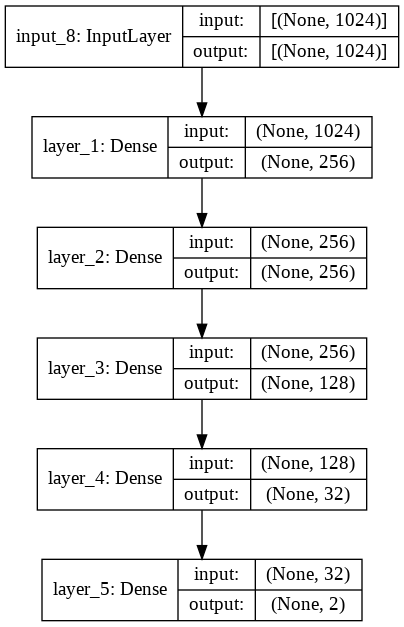

In [88]:
plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [90]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[callback], verbose=0)

In [96]:
print(len(history.history['loss']))
print(len(history.history['val_loss']))

39
39


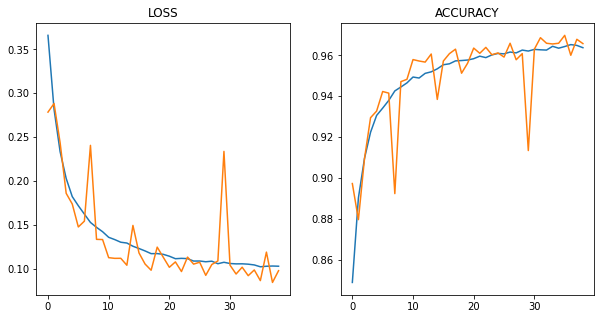

In [97]:
figure, axes = plt.subplots(1, 2)
figure.set_size_inches((10, 5))
epochs = np.arange(len(history.history['loss']))
axes[0].plot(epochs, history.history['loss'])
axes[0].plot(epochs, history.history['val_loss'])
axes[0].set_title("LOSS")

axes[1].plot(epochs, history.history['accuracy'])
axes[1].plot(epochs, history.history['val_accuracy'])
axes[1].set_title("ACCURACY")

plt.show()